In [58]:
from openseespy.opensees import *
import numpy as np
import matplotlib.pyplot as plt
import opsvis as opsv

In [59]:
# --------------------------
# Start of model generation
# --------------------------

In [60]:
# remove existing model
wipe()

In [61]:
# set modelbuilder
model('basic', '-ndm', 2, '-ndf', 2)

In [62]:
# create nodes
node(1, 0.0, 0.0)
node(2, 144.0, 0.0)
node(3, 168.0, 0.0)
node(4, 72.0, 96.0)

In [63]:
# set boundary conditions
fix(1, 1, 1)
fix(2, 1, 1)
fix(3, 1, 1)

In [64]:
# define materials
uniaxialMaterial("Elastic", 1, 3000.0)

In [65]:
# define elements => element("Truss", eleTag, *eleNodes, A, matTag)
element("Truss", 1, *[1, 4], 10.0, 1)
element("Truss", 2, *[2, 4], 5.0, 1)
element("Truss", 3, *[3, 4], 5.0, 1)

In [66]:
# create TimeSeries => timeSeries('Linear', tsTag)
timeSeries("Linear", 1)

In [67]:
# create a plain load pattern => pattern('Plain', patternTag, tsTag)
pattern("Plain", 1, 1)

In [68]:
# create a nodal load => load(nodeTag, *loadValues)
load(4, 100.0, -50.0)

In [69]:
# -----------------------------
# Start of analysis generation
# -----------------------------

In [70]:
# create SOE
system("BandSPD")

In [71]:
# create DOF numberer
numberer("RCM")

In [72]:
# create constraint handler
constraints("Plain")

In [73]:
# create integrator
integrator("LoadControl", 1.0)

In [74]:
# create algorithm
algorithm("Linear")

In [75]:
# create analysis object
analysis("Static")

In [76]:
# perform the analysis
analyze(1)

0

In [77]:
# -----------------------------
# Start of analysis generation
# -----------------------------

In [78]:
ux = nodeDisp(4,1)
uy = nodeDisp(4,2)

In [79]:
if abs(ux-0.53009277713228375450)<1e-12 and abs(uy+0.17789363846931768864)<1e-12:
    print(f"ux = {ux}\nuy = {uy} \nStatus = Passed!")
else:
    print("Failed!")

ux = 0.5300927771322838
uy = -0.1778936384693177 
Status = Passed!


<Axes: >

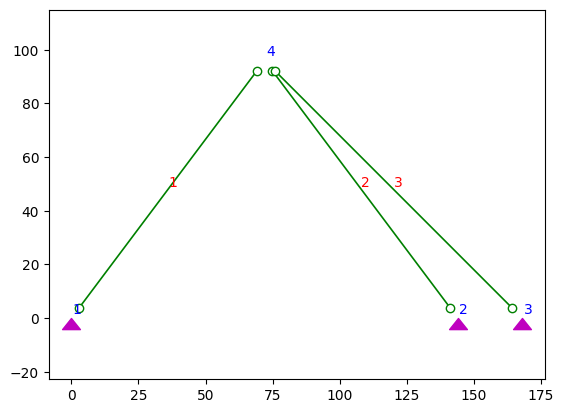

In [80]:
opsv.plot_model()

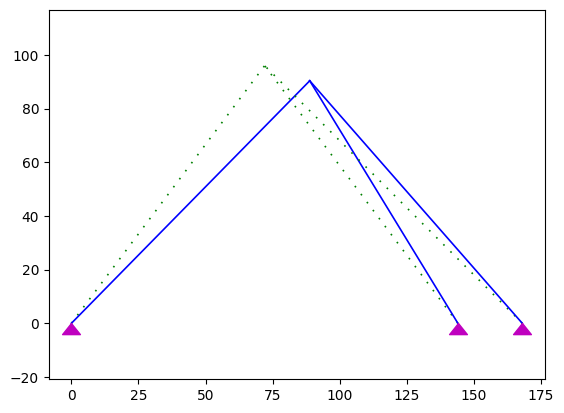

In [81]:
sfac = opsv.plot_defo()